# EDA Processed Data - Basic

NILM

Javier Monreal Tolmo. GFT Spain

September 2024 - October 2024

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path

from nilm import logger

log = logger.init(level="DEBUG", save_log=False)
log.debug(" ---- EDA Processed Data ----")


ModuleNotFoundError: No module named 'nilm'

## Load NILMTK Data

In [ ]:

import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet('random.h5')
elec = ds.buildings[1].elec

print(elec)
plt.plot(elec[1].power_series_all_data())

# Load HIPE Data

In [7]:
data_path = "../data"

from nilm.load_utils.load_data import unzip_files

zip_file = "hipe_cleaned_v1.0.1_geq_2017-10-01_lt_2018-01-01_features_v1.0.0_only-on_1hour-agg.zip"

unzip_files(data_path, zip_file, output_path = data_path / Path(zip_file.split('.')[0]))

In [8]:
from nilm.load_utils.load_data import get_file_names

folder_path = Path(data_path) / "hipe_cleaned_v1"

file_names = get_file_names(folder_path, format="csv")

print(len(file_names))


11


In [37]:
data_appliances = {}

for csv_file in file_names[:]:

    file_name = str(csv_file).split("/")[-1].split("_geq")[0]
    data_appliances[file_name]  = pd.read_csv(csv_file, decimal=".", low_memory=False, parse_dates=["id"], index_col="id")


In [38]:
data_appliances.keys()

dict_keys(['VacuumOven_PhaseCount_3', 'ChipPress_PhaseCount_3', 'ScreenPrinter_PhaseCount_2', 'WashingMachine_PhaseCount_3', 'VacuumPump1_PhaseCount_3', 'PickAndPlaceUnit_PhaseCount_2', 'SolderingOven_PhaseCount_3', 'VacuumPump2_PhaseCount_2', 'HighTemperatureOven_PhaseCount_3', 'ChipSaw_PhaseCount_3', 'MainTerminal_PhaseCount_3'])

In [33]:
data_appliances[file_name].shape

(139, 254)

In [28]:
import plotly.express as px

In [36]:
data_appliances['VacuumOven_PhaseCount_3'].index

RangeIndex(start=0, stop=139, step=1)

In [29]:
len(data_appliances['VacuumOven_PhaseCount_3'].index)

139

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
# heatmap all variables
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
corr_matrix = df_all.reset_index(drop=True).corr(numeric_only=True)
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

In [ ]:
# Generate pandas profile report
# df_all_profile = df_all.set_index("kiln", append=True, drop=False).copy()
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_all, title="Processed Combined Data", explorative=False)
# output_file="../reports/eda_processed.html"
# # create parent directory if it does not exist
# Path(output_file).parent.mkdir(parents=True, exist_ok=True)
# profile.to_file(output_file=output_file)

# Converted Data

In [3]:
from pathlib import Path

In [4]:
DATA_PATH = '../../data/'

In [5]:

import h5py
f = h5py.File(Path(DATA_PATH) / 'hipe_15min.h5','r')
for item in f.keys():
    print(item)

building1


## HDFStore

In [5]:
from pandas import HDFStore

hdf_hipe = HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', mode="r")
hdf_hipe.keys()
#data = hdf.get(‘/key1’)

['/building1/elec/meter1',
 '/building1/elec/meter10',
 '/building1/elec/meter11',
 '/building1/elec/meter2',
 '/building1/elec/meter3',
 '/building1/elec/meter4',
 '/building1/elec/meter5',
 '/building1/elec/meter6',
 '/building1/elec/meter7',
 '/building1/elec/meter8',
 '/building1/elec/meter9']

In [6]:
hdf_hipe.get('/building1/elec/meter1')

physical_quantity,power
type,apparent
,
2017-10-01 00:00:00+02:00,6685.333285
2017-10-01 00:15:00+02:00,6525.792667
2017-10-01 00:30:00+02:00,6502.073204
2017-10-01 00:45:00+02:00,7280.914612
2017-10-01 01:00:00+02:00,6667.804850
...,...
2017-12-31 22:45:00+01:00,6064.024355
2017-12-31 23:00:00+01:00,8979.634153


#### Metadata

In [7]:
key = '/building1/'
with HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', "r") as data_store:
    node = data_store.get_node(key)
    print(node._v_attrs.metadata['appliances'])

[{'original_name': 'chip_press', 'type': 'motor', 'instance': 1, 'meters': [2]}, {'original_name': 'chip_saw', 'type': 'motor', 'instance': 2, 'meters': [3]}, {'original_name': 'high_temperature_oven', 'type': 'oven', 'instance': 1, 'meters': [4]}, {'original_name': 'pick_and_place_unit', 'type': 'motor', 'instance': 3, 'meters': [5]}, {'original_name': 'screen_printer', 'type': 'printer', 'instance': 1, 'meters': [6]}, {'original_name': 'soldering_oven', 'type': 'oven', 'instance': 2, 'meters': [7]}, {'original_name': 'vacuum_oven', 'type': 'oven', 'instance': 3, 'meters': [8]}, {'original_name': 'vacuum_pump', 'type': 'motor', 'instance': 4, 'meters': [9]}, {'original_name': 'vacuum_pump', 'type': 'motor', 'instance': 5, 'meters': [10]}, {'original_name': 'washing_machine', 'type': 'washing machine', 'instance': 1, 'meters': [11]}]


#### Data

In [8]:
### Load Dataframe
with HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', "r") as data_store:

    df = data_store.get('/building1/elec/meter1')
    print(df.columns)

MultiIndex([('power', 'apparent')],
           names=['physical_quantity', 'type'])


In [9]:
from tabulate import tabulate
power_df = df['power']
print(tabulate(power_df.head(), headers='keys', tablefmt='psql'))

+---------------------------+------------+
|                           |   apparent |
|---------------------------+------------|
| 2017-10-01 00:00:00+02:00 |    6685.33 |
| 2017-10-01 00:15:00+02:00 |    6525.79 |
| 2017-10-01 00:30:00+02:00 |    6502.07 |
| 2017-10-01 00:45:00+02:00 |    7280.91 |
| 2017-10-01 01:00:00+02:00 |    6667.8  |
+---------------------------+------------+


## Dataset

In [6]:
from nilmtk.dataset import DataSet

hipe = DataSet(str(Path(DATA_PATH) / 'hipe_15min.h5'))

In [7]:
elec = hipe.buildings[1].elec

In [70]:
mains_meter = elec.mains()

In [79]:
mains = next(mains_meter.load())

In [82]:
mains.max()

physical_quantity  type    
power              apparent    53004.355823
dtype: float64

In [9]:
appliance_meters = elec.meters_directly_downstream_of_mains()

In [77]:
appliance_meters.__dict__

{'meters': [ElecMeter(instance=2, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=1)]),
  ElecMeter(instance=3, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=2)]),
  ElecMeter(instance=4, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=1)]),
  ElecMeter(instance=5, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=3)]),
  ElecMeter(instance=6, building=1, dataset='HIPE', appliances=[Appliance(type='printer', instance=1)]),
  ElecMeter(instance=7, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=2)]),
  ElecMeter(instance=8, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=3)]),
  ElecMeter(instance=9, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=4)]),
  ElecMeter(instance=10, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=5)]),
  ElecMeter(instance=11, building=1, dataset='HIPE', appliances

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#### Chip Press

In [19]:
appliance_meters.meters[0].name


'Chip Press'

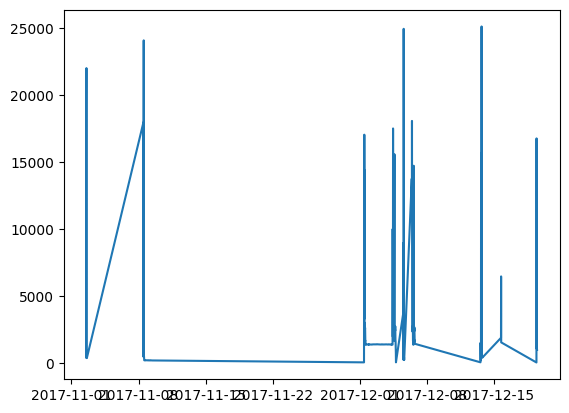

In [11]:
df_chip_press = next(appliance_meters.meters[0].load())
plt.plot(df_chip_press.index, df_chip_press[('power', 'active')])

In [15]:
df_chip_press

physical_quantity,power
type,active
,
2017-11-02 13:00:00+01:00,425.285710
2017-11-02 13:15:00+01:00,12758.773007
2017-11-02 13:30:00+01:00,19110.245409
2017-11-02 13:45:00+01:00,22004.567855
2017-11-02 14:00:00+01:00,3263.926369
...,...
2017-12-19 09:45:00+01:00,1079.634136
2017-12-19 10:00:00+01:00,1188.597554


In [58]:
px.scatter(df_chip_press, x=df_chip_press.index, y=df_chip_press[('power', 'active')].values).update_traces(mode="lines+markers")

In [113]:
print(f"Min: {df_chip_press.values.min()} \n Max: {df_chip_press.values.max()}")

Min: 48.9583340628693 
 Max: 25110.552076913093


Text(0.5, 1.0, 'Power consumption levels of the Chip Press')

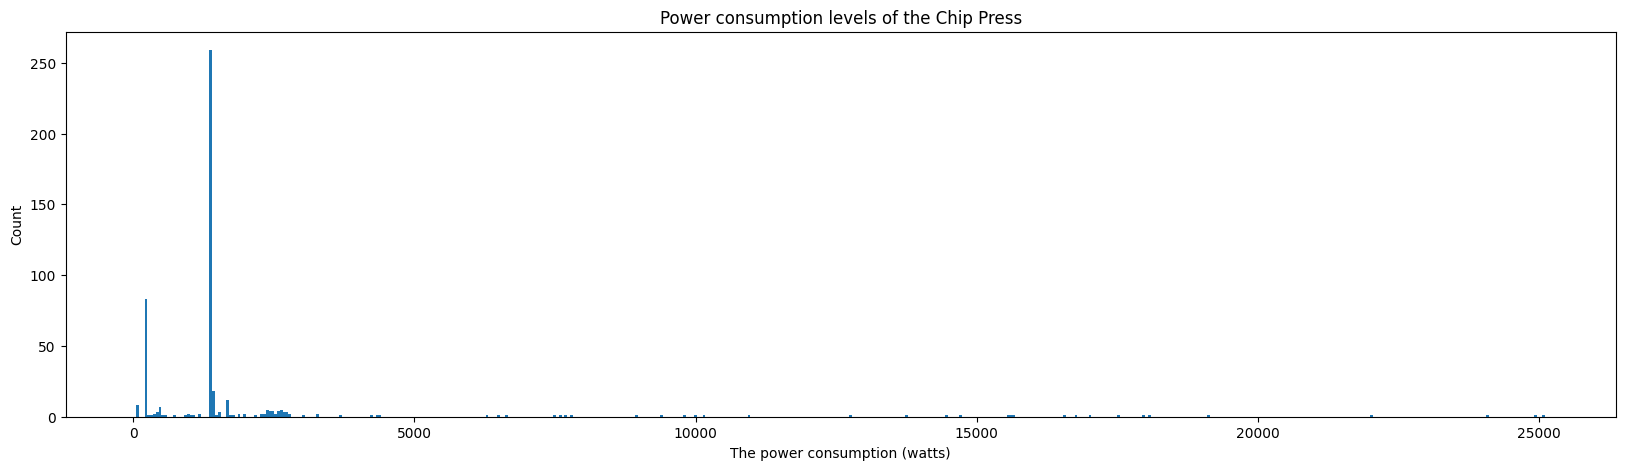

In [97]:
figure(figsize=(20,5))
_ = plt.hist(df_chip_press[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Chip Press')

#### Chip Saw

In [98]:
appliance_meters.meters[1].name


'Chip Saw'

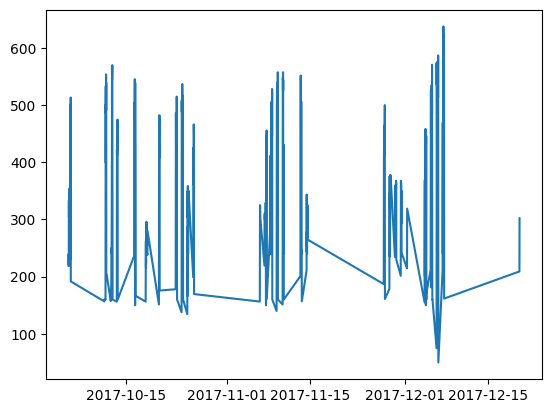

In [43]:
df_chip_saw = next(appliance_meters.meters[1].load())
plt.plot(df_chip_saw.index, df_chip_saw[('power', 'active')])

In [56]:
px.scatter(df_chip_saw, x=df_chip_saw.index, y=df_chip_saw[('power', 'active')].values).update_traces(mode="lines+markers")

In [114]:
print(f"Min: {df_chip_saw.values.min()} \n Max: {df_chip_saw.values.max()}")

Min: 49.999998882412896 
 Max: 637.3619644851224


Text(0.5, 1.0, 'Power consumption levels of the Chip Saw')

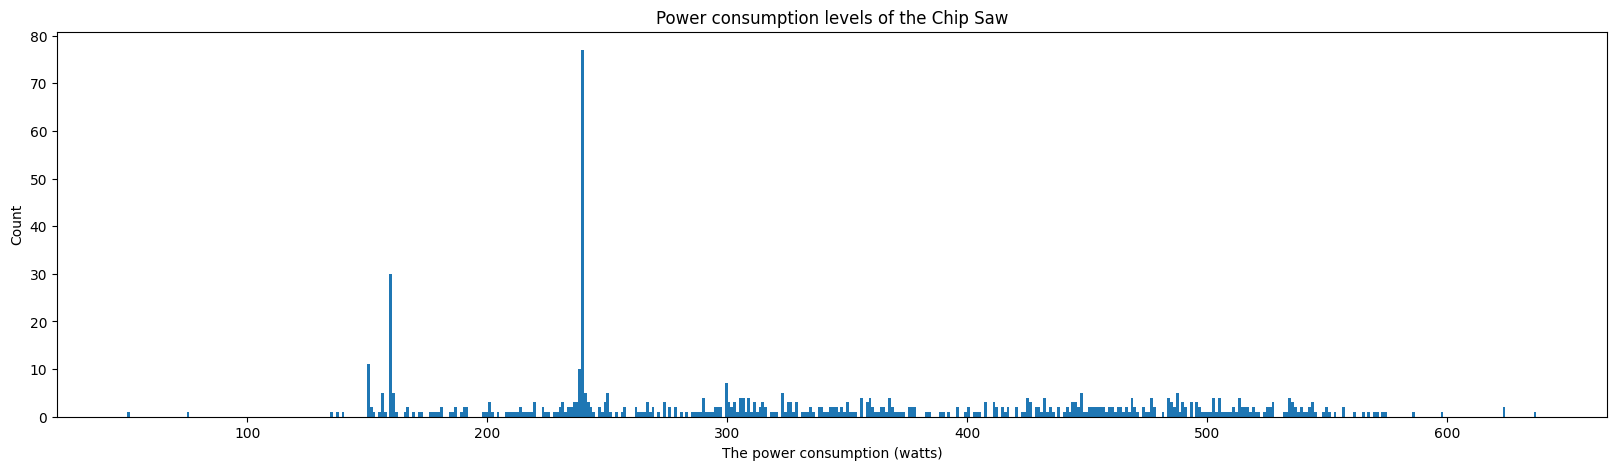

In [100]:
figure(figsize=(20,5))
_ = plt.hist(df_chip_saw[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Chip Saw')

#### High Temperature Oven

In [101]:
appliance_meters.meters[2].name


'High Temperature Oven'

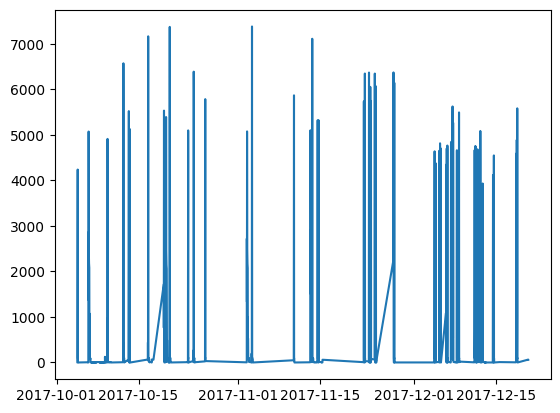

In [45]:
high_temperature_oven = next(appliance_meters.meters[2].load())
plt.plot(high_temperature_oven.index, high_temperature_oven[('power', 'active')])

In [59]:
px.scatter(high_temperature_oven, x=high_temperature_oven.index, y=high_temperature_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [115]:
print(f"Min: {high_temperature_oven.values.min()} \n Max: {high_temperature_oven.values.max()}")

Min: 0.0 
 Max: 7379.202401711166


Text(0.5, 1.0, 'Power consumption levels of the High Temperature Oven')

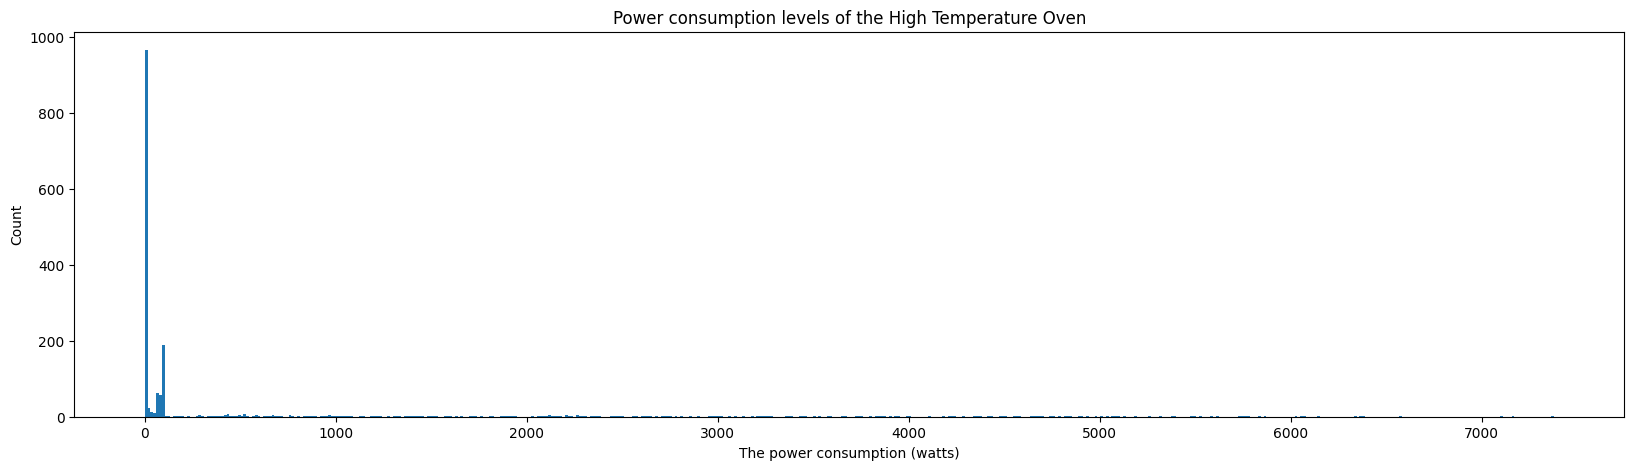

In [120]:
figure(figsize=(20,5))
_ = plt.hist(high_temperature_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the High Temperature Oven')

#### Pick And Place Unit

In [117]:
appliance_meters.meters[3].name


'Pick And Place Unit'

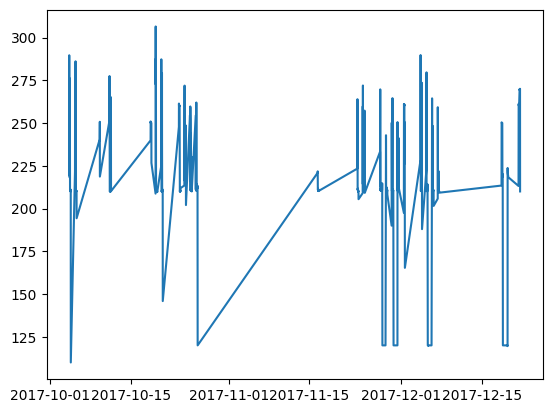

In [47]:
pick_and_place_unit = next(appliance_meters.meters[3].load())
plt.plot(pick_and_place_unit.index, pick_and_place_unit[('power', 'active')])

In [54]:
px.scatter(pick_and_place_unit, x=pick_and_place_unit.index, y=pick_and_place_unit[('power', 'active')].values).update_traces(mode="lines+markers")

In [119]:
print(f"Min: {pick_and_place_unit.values.min()} \n Max: {pick_and_place_unit.values.max()}")

Min: 109.9999994039535 
 Max: 306.4444477359453


Text(0.5, 1.0, 'Power consumption levels of the Pick And Place Unit')

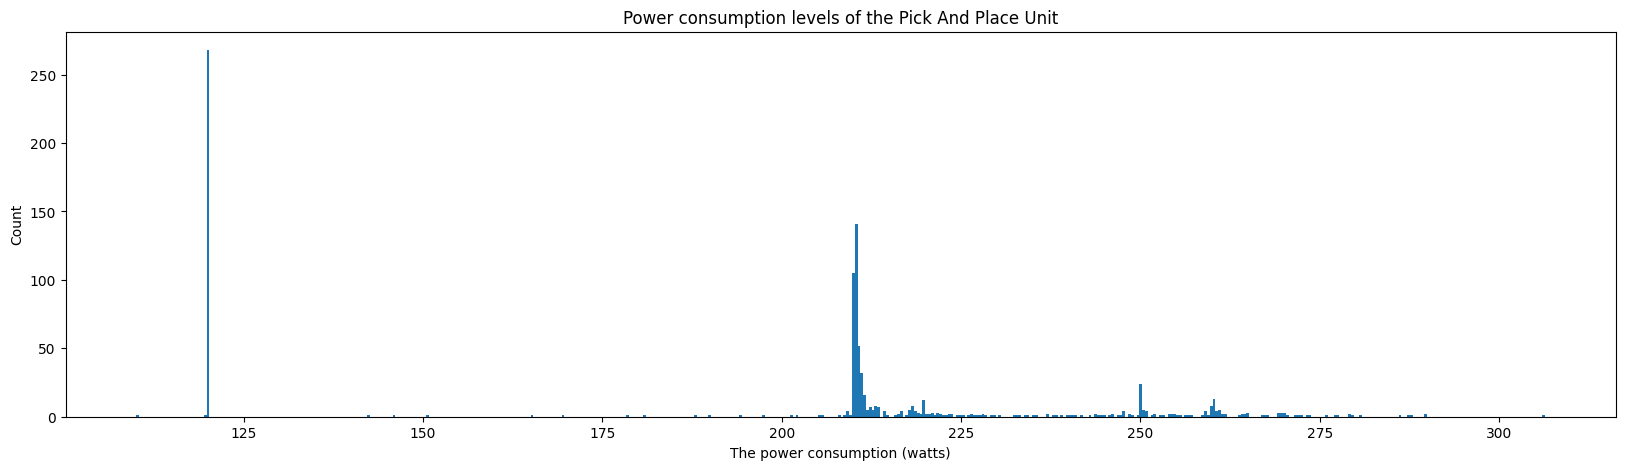

In [121]:
figure(figsize=(20,5))
_ = plt.hist(pick_and_place_unit[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Pick And Place Unit')

#### Screen Printer

In [122]:
appliance_meters.meters[4].name

'Screen Printer'

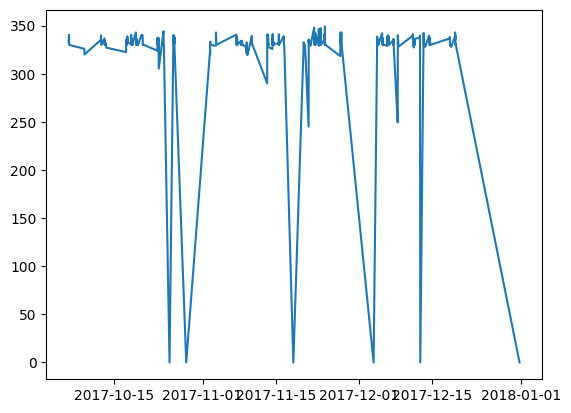

In [50]:
screen_printer = next(appliance_meters.meters[4].load())
plt.plot(screen_printer.index, screen_printer[('power', 'active')])

In [52]:
px.scatter(screen_printer, x=screen_printer.index, y=screen_printer[('power', 'active')].values).update_traces(mode="lines+markers")

In [127]:
print(f"Min: {screen_printer.values.min()} \n Max: {screen_printer.values.max()}")

Min: 0.0 
 Max: 349.1208818587628


Text(0.5, 1.0, 'Power consumption levels of the Screen Printer')

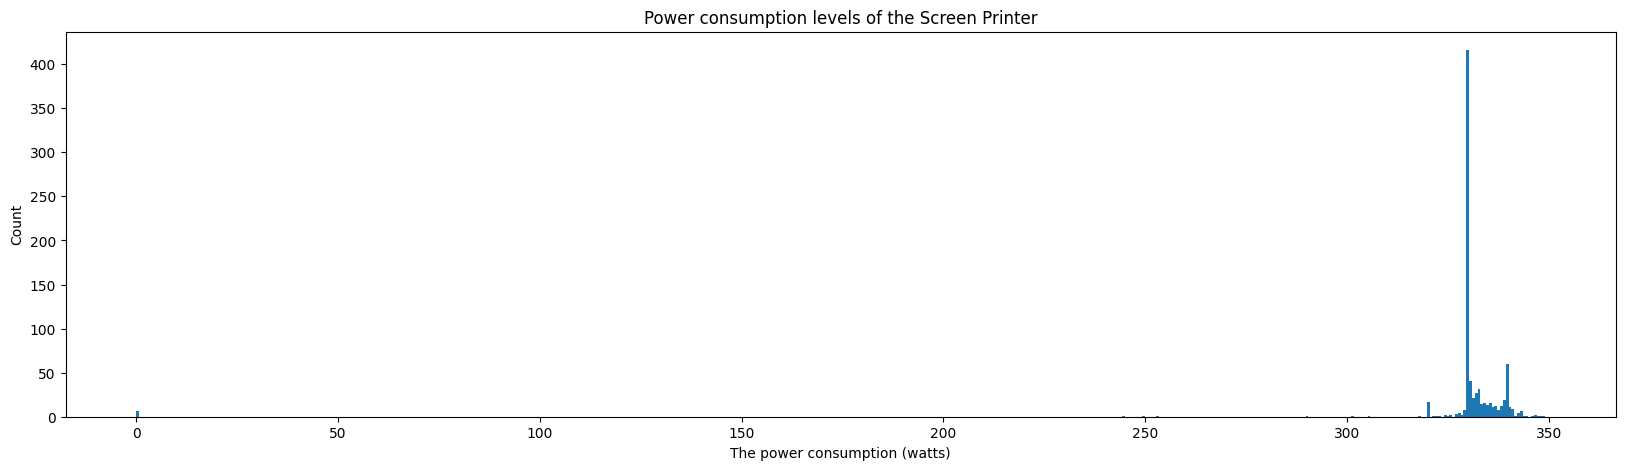

In [128]:
figure(figsize=(20,5))
_ = plt.hist(screen_printer[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Screen Printer')

#### Soldering Oven

In [129]:
appliance_meters.meters[5].name

'Soldering Oven'

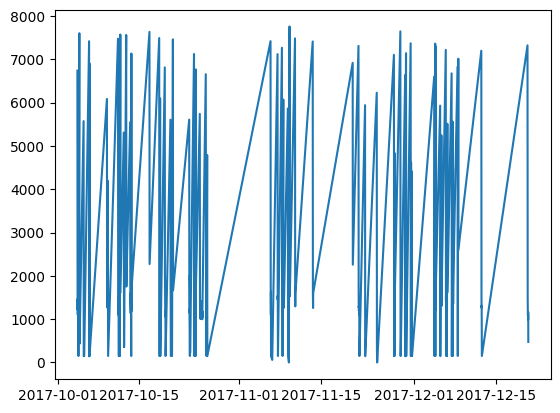

In [61]:
soldier_oven = next(appliance_meters.meters[5].load())
plt.plot(soldier_oven.index, soldier_oven[('power', 'active')])

In [62]:
px.scatter(soldier_oven, x=soldier_oven.index, y=soldier_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [132]:
print(f"Min: {soldier_oven.values.min()} \n Max: {soldier_oven.values.max()}")

Min: 0.0 
 Max: 7755.384616362742


Text(0.5, 1.0, 'Power consumption levels of the Soldering Oven')

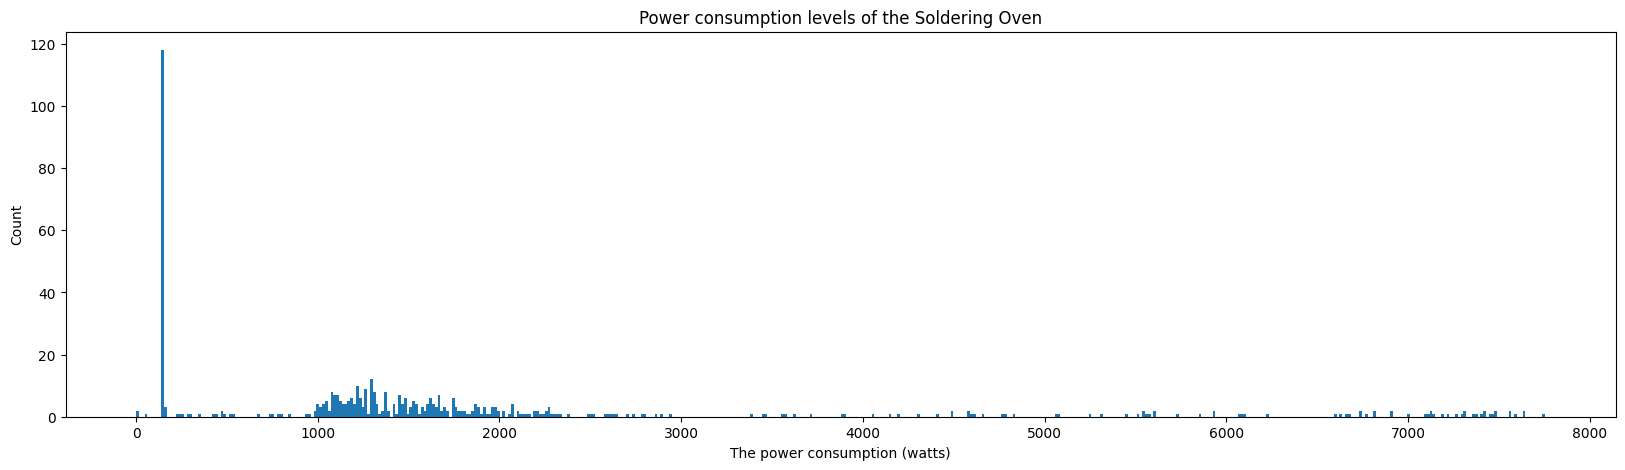

In [133]:
figure(figsize=(20,5))
_ = plt.hist(soldier_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Soldering Oven')

#### Vacuum Oven

In [134]:
appliance_meters.meters[6].name

'Vacuum Oven'

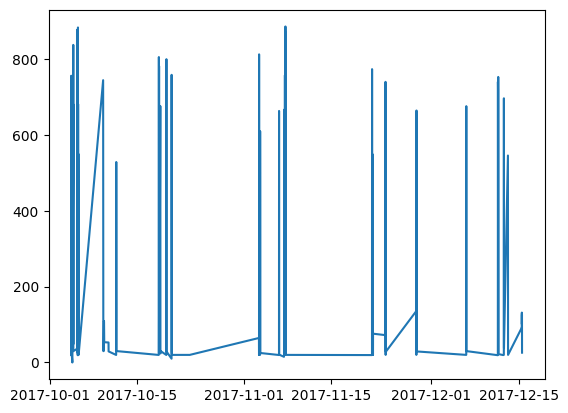

In [63]:
vacuum_oven = next(appliance_meters.meters[6].load())
plt.plot(vacuum_oven.index, vacuum_oven[('power', 'active')])

In [64]:
px.scatter(vacuum_oven, x=vacuum_oven.index, y=vacuum_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [138]:
print(f"Min: {vacuum_oven.values.min()} \n Max: {vacuum_oven.values.max()}")

Min: 0.0 
 Max: 886.0248492232391


Text(0.5, 1.0, 'Power consumption levels of the Vacuum Oven')

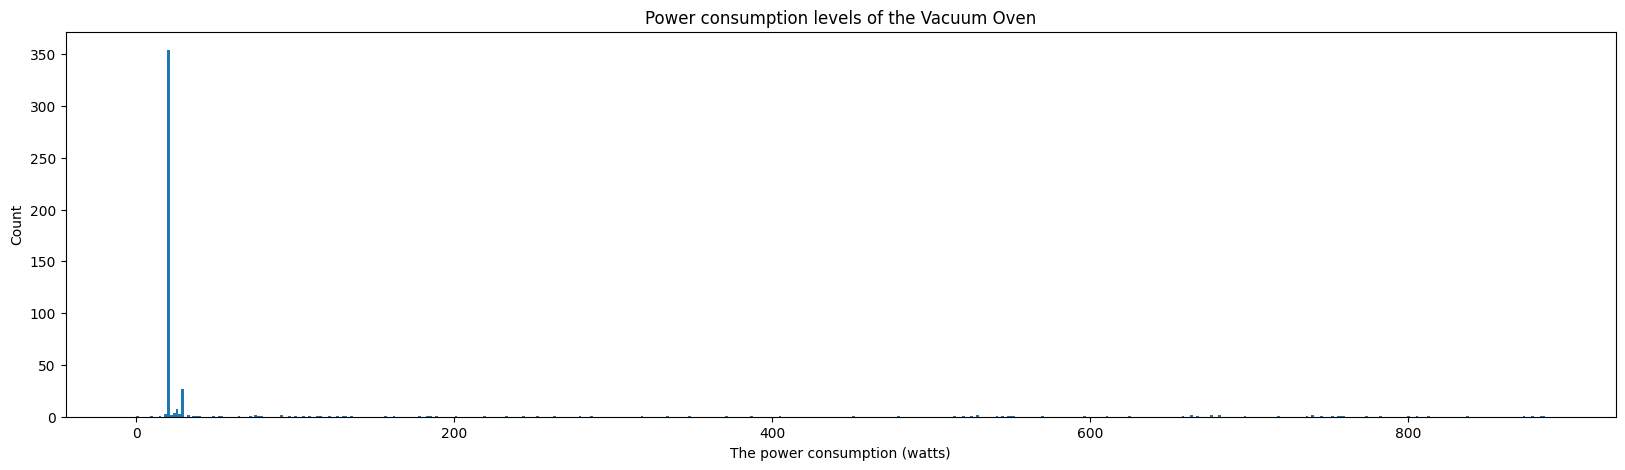

In [139]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Oven')

#### Vacuum Pump 1

In [140]:
appliance_meters.meters[7].name

'Vacuum Pump'

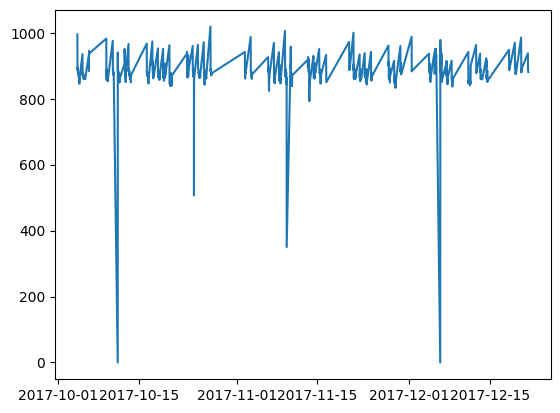

In [65]:
vacuum_pump_1 = next(appliance_meters.meters[7].load())
plt.plot(vacuum_pump_1.index, vacuum_pump_1[('power', 'active')])

In [66]:
px.scatter(vacuum_pump_1, x=vacuum_pump_1.index, y=vacuum_pump_1[('power', 'active')].values).update_traces(mode="lines+markers")

In [ ]:
px.scatter(vacuum_oven, x=vacuum_oven.index, y=vacuum_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [142]:
print(f"Min: {vacuum_pump_1.values.min()} \n Max: {vacuum_pump_1.values.max()}")

Min: 0.0 
 Max: 1019.2105318174551


Text(0.5, 1.0, 'Power consumption levels of the Vacuum Pump')

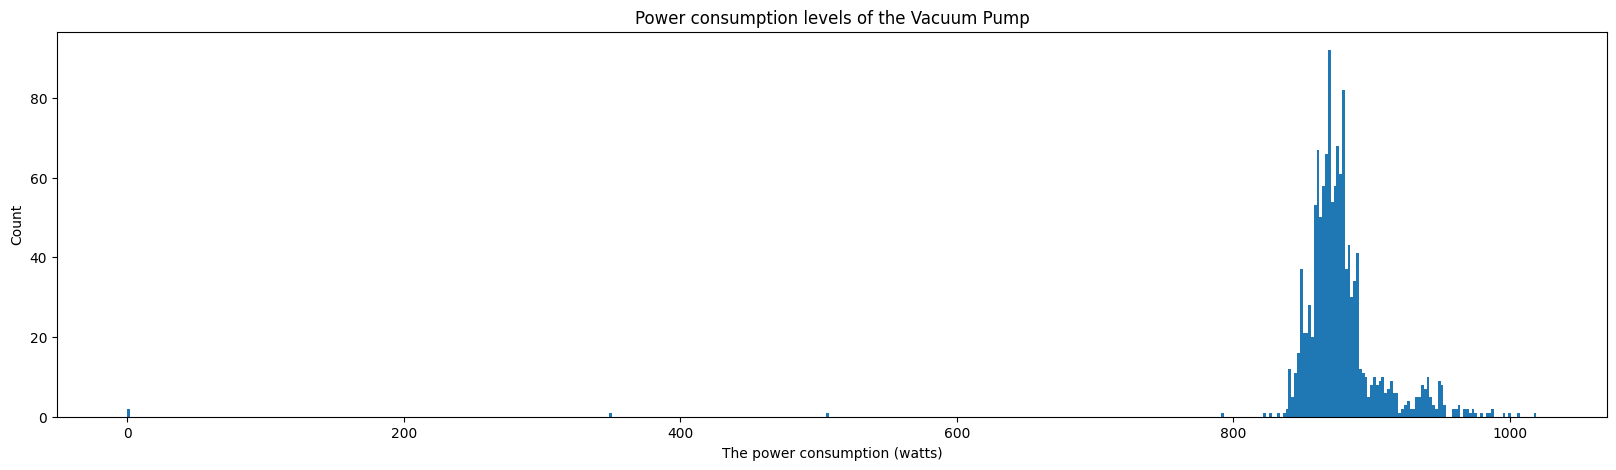

In [143]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_pump_1[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Pump 1')

#### Vacuum Pump 2

In [145]:
appliance_meters.meters[8].name

'Vacuum Pump'

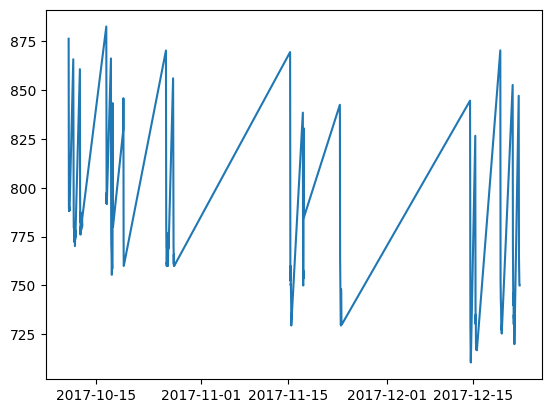

In [147]:
vacuum_pump_2 = next(appliance_meters.meters[8].load())
plt.plot(vacuum_pump_2.index, vacuum_pump_2[('power', 'active')])

In [148]:
print(f"Min: {vacuum_pump_2.values.min()} \n Max: {vacuum_pump_2.values.max()}")

Min: 710.5882167816162 
 Max: 882.5925897668909


Text(0.5, 1.0, 'Power consumption levels of the Vacuum Pump 2')

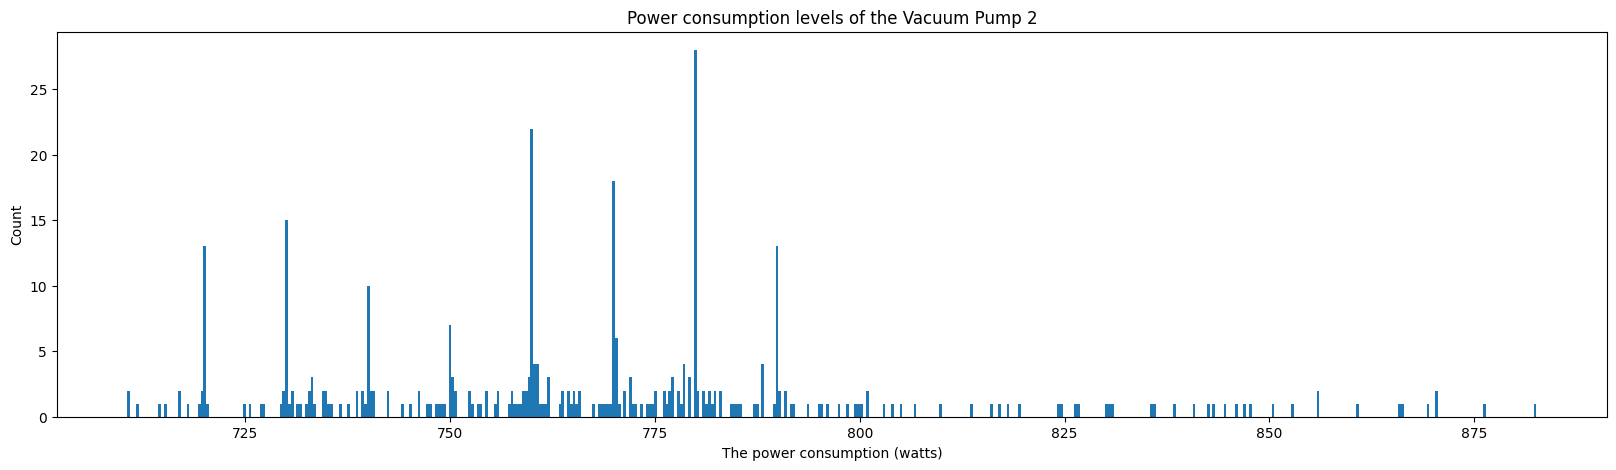

In [149]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_pump_2[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Pump 2')

#### Washing Machine

In [150]:
appliance_meters.meters[9].name

'Washing Machine'

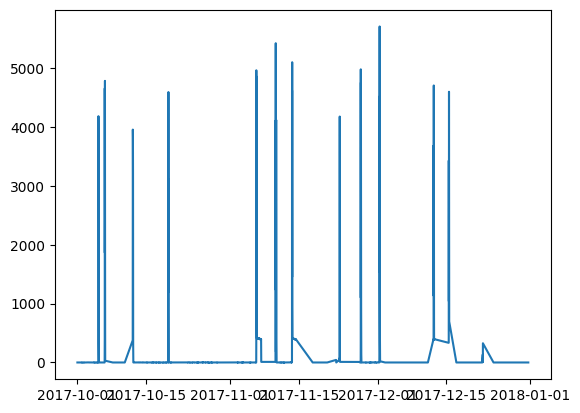

In [68]:
washing_machine = next(appliance_meters.meters[9].load())
plt.plot(washing_machine.index, washing_machine[('power', 'active')])

In [69]:
px.scatter(washing_machine, x=washing_machine.index, y=washing_machine[('power', 'active')].values).update_traces(mode="lines+markers")

In [152]:
print(f"Min: {washing_machine.values.min()} \n Max: {washing_machine.values.max()}")

Min: 0.0 
 Max: 5710.740730281414


Text(0.5, 1.0, 'Power consumption levels of the Washing Machine')

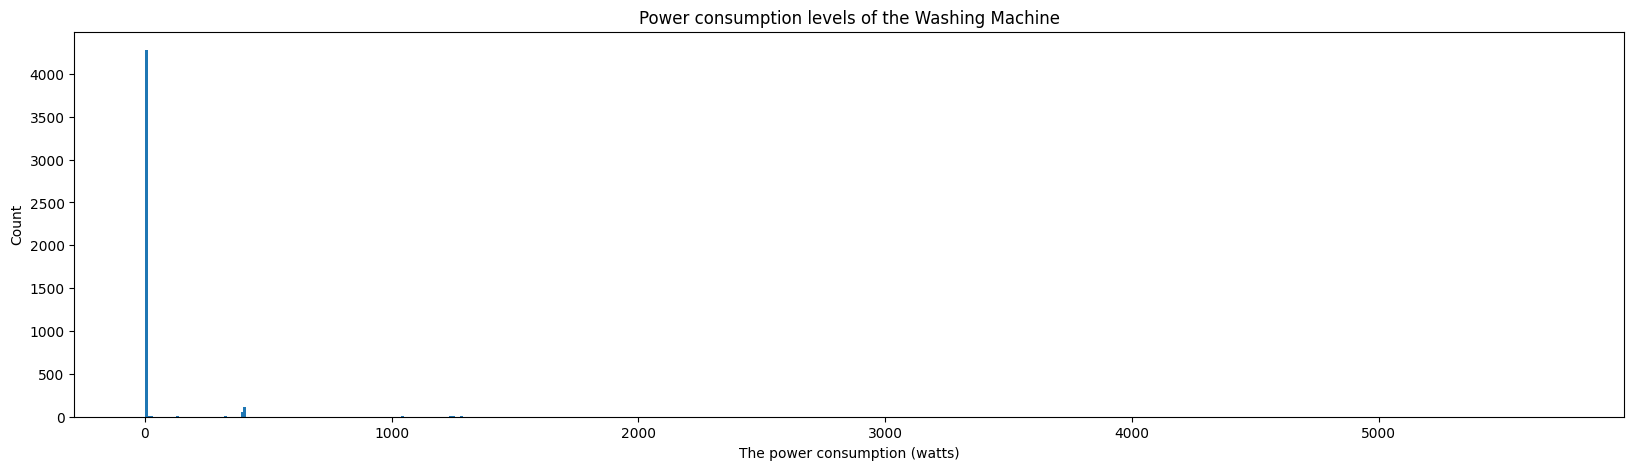

In [153]:
figure(figsize=(20,5))
_ = plt.hist(washing_machine[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Washing Machine')

In [20]:
hipe.set_window(start='2017-11-01',  end='2018-01-01')
df_wm = next(hipe.buildings[1].elec['washing machine'].load())
df_main = next(hipe.buildings[1].elec.mains().load())

**Checking the available measurements**

In [21]:
df_main.columns

MultiIndex([('power', 'apparent')],
           names=['physical_quantity', 'type'])

In [22]:
df_wm.columns

MultiIndex([('power', 'active')],
           names=['physical_quantity', 'type'])

**The rate of NaN values in the dataset**

In [26]:
df_wm.columns

MultiIndex([('power', 'active')],
           names=['physical_quantity', 'type'])

In [28]:
df_wm[('power', 'active')].isnull().mean()

np.float64(0.0)

In [ ]:
df_wm['active_power'].isnull().mean()

0.0

**The values distribution**

To check the distribution, we will not account for the 0's included in the dataset. We are also aware that the washing machine is big consumer and tehrefore we will filter small value that most probably noise related to measurement devices.

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 1.0, 'Power consumption levels of the washing machine')

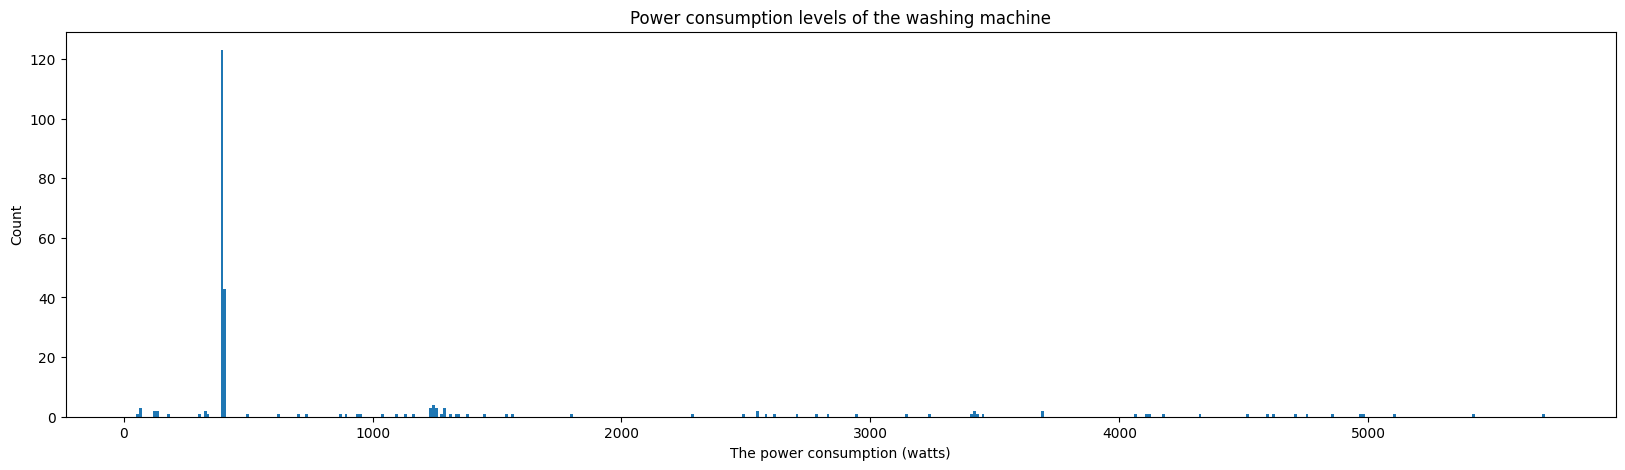

In [32]:
figure(figsize=(20,5))
_ = plt.hist(df_wm[('power', 'active')].values[df_wm[('power', 'active')].values>50], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the washing machine')

Text(0, 0.5, 'The power consumption')

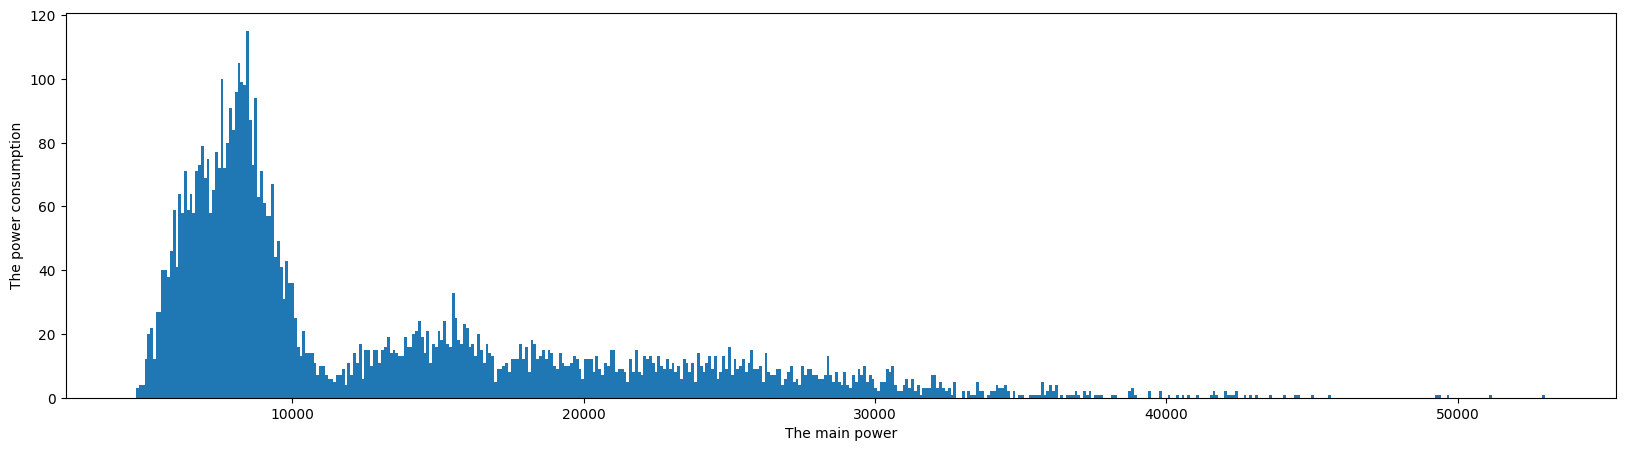

In [33]:
figure(figsize=(20,5))
_ = plt.hist(df_main[('power', 'apparent')].values, bins=500)
plt.xlabel('The main power')
plt.ylabel('The power consumption')